
# Data Visualization + Analysis
The objective of this notebook is to visually represent the data we have gathered previously by utilizing various types of plots. By presenting the data in a graphical format, we can enhance our understanding and derive meaningful insights from it.

The process of data visualization allows us to explore patterns, trends, and relationships within the data through visual representations such as charts, graphs, and diagrams.

In [3]:
# import libraries

import json
from datetime import datetime
import matplotlib.pyplot as plt
from statistics import mean


In [4]:
# directories 

RESTAURANT_LIST_DIR = '../collected_data/yemeksepeti_restaurants_list_per_city/'
REVIEWS_COLLECTION_DIR = '../collected_data/yemeksepeti_reviews_collection_per_city/'

In [5]:
# A list of all cities in turkey with their index - 1 corresponding to the city's id (il kodu)
# e.g. cities[33] == cities[34 - 1] == "Istanbul" 

cities = ["Adana", "Adıyaman", "Afyon", "Ağrı", "Amasya", "Ankara", "Antalya", "Artvin", "Aydın", "Balıkesir", "Bilecik", "Bingöl", "Bitlis", "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", "Diyarbakır", "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane", "Hakkari", "Hatay", "Isparta", "İçel (Mersin)", "İstanbul", "İzmir", "Kars", "Kastamonu", "Kayseri", "Kırklareli", "Kırşehir", "Kocaeli", "Konya", "Kütahya", "Malatya", "Manisa", "Kahramanmaraş", "Mardin", "Muğla", "Muş", "Nevşehir", "Niğde", "Ordu", "Rize", "Sakarya", "Samsun", "Siirt", "Sinop", "Sivas", "Tekirdağ", "Tokat", "Trabzon", "Tunceli", "Şanlıurfa", "Uşak", "Van", "Yozgat", "Zonguldak", "Aksaray", "Bayburt", "Karaman", "Kırıkkale", "Batman", "Şırnak", "Bartın", "Ardahan", "Iğdır", "Yalova", "Karabük", "Kilis", "Osmaniye", "Düzce"]

In [6]:
# return the filename for restaurants data in a city

def data_filename_for_city(city_id):
    filename = None
    if(1 <= city_id and city_id <= len(cities)):
        filename = RESTAURANT_LIST_DIR + f'{city_id}_yemeksepeti_{cities[city_id - 1]}_restaurants_data.json'
    else:
        print(f"city id ({city_id}) out of range. range: [1,{len(cities)}]")
    return filename

In [7]:
# return the filename for restaurants reviews in a city

def reviews_filename_for_city(city_id):
    filename = None
    if(1 <= city_id and city_id <= len(cities)):
        filename = REVIEWS_COLLECTION_DIR + f'{city_id}_yemeksepeti_{cities[city_id - 1]}_restaurants_reviews.json'
    else:
        print(f"city id ({city_id}) out of range. range: [1,{len(cities)}]")
    return filename

In [8]:
def json_file_to_dict(filename):
    with open(filename) as f:
        data = json.load(f)
    return data
    

In [ ]:
#create a dictionary with keys being the city id's and values being a list of ratings timestamps [(timestamp(datetime object), rating), ...]
ratings_timestamp_per_city = {}

# add all ratings here regardless of city
all_ratings_with_timestamp = []

for city_id, city_name in enumerate(cities, start=1):
      info_filename = data_filename_for_city(city_id)
      info_dict = json_file_to_dict(info_filename)

      reviews_filename = reviews_filename_for_city(city_id)
      reviews_dict = json_file_to_dict(reviews_filename)

      for restaurant in info_dict['data']['items']:
            try:
                  restaurant_reviews = reviews_dict[restaurant['code']]['data']
            except:
                  print(f"rating data is not available for resturant with code {restaurant['code']} in {cities[city_id - 1]}.")

            reviews_timestamp = [] # [(timestamp(datetime object), rating), ...]
            for review in restaurant_reviews:
                  timestamp = datetime.strptime(review['createdAt'], "%Y-%m-%dT%H:%M:%SZ")
                  overall_rating = review['ratings'][0]['score'] / 10
                  reviews_timestamp.append((timestamp, overall_rating))
                  all_ratings_with_timestamp.append((timestamp, overall_rating))

            ratings_timestamp_per_city[city_id] = reviews_timestamp
            

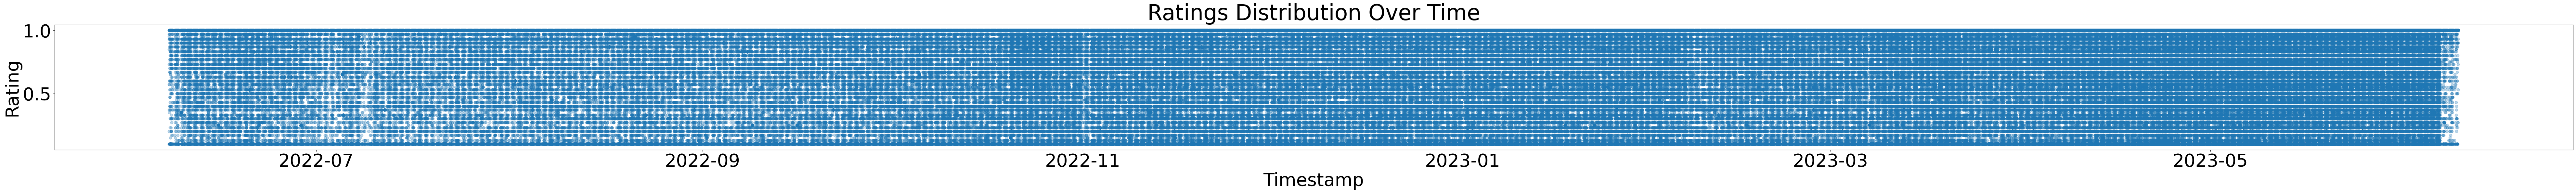

In [10]:

# Assuming ratings_timestamp_per_city is a list of tuples [(datetime, numerical value), ...]

# Separate the datetime and numerical value into two lists
timestamps = [item[0] for item in all_ratings_with_timestamp]
values = [item[1] for item in all_ratings_with_timestamp]
fig = plt.figure(figsize=(100,5))
plt.rcParams['font.size'] = 40

# Create the scatter plot
plt.scatter(timestamps, values, alpha=0.3)

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.title('Ratings Distribution Over Time')

# Show the plot
plt.show()


## Analysis
Upon examining the presented scatterplot, we can derive valuable insights regarding the distribution of ratings over time. A notable observation is the increasing number of ratings submitted as time progresses. However, it is intriguing to note that the overall distribution of ratings has exhibited limited variations throughout this period. To gain further understanding and explore potential trends, we will proceed with plotting the monthly averages of overall ratings. This additional analysis will enable us to delve deeper into the underlying patterns and dynamics within the dataset.

In [11]:
ratings_per_month = {}

for rating in all_ratings_with_timestamp:
    month_group = rating[0].strftime("%Y-%m")
    if month_group in ratings_per_month.keys():
        ratings_per_month[month_group].append(rating[1])
    else:
        ratings_per_month[month_group] = [rating[1]]

In [12]:
ratings_average_per_month = {}
print(ratings_per_month)
for month_gorup, ratings_list in ratings_per_month.items():
    ratings_average_per_month[month_gorup] = mean(ratings_list)

{'2023-04': [0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1, 1.0, 0.97, 0.3, 1.0, 0.22999999999999998, 0.13, 0.2, 0.2, 0.73, 1.0, 0.6, 1.0, 0.1, 0.65, 0.7, 0.2, 0.1, 1.0, 1.0, 1.0, 1.0, 0.75, 0.1, 0.1, 0.2, 1.0, 0.1, 1.0, 0.27, 0.93, 1.0, 1.0, 0.2, 1.0, 0.1, 0.67, 1.0, 1.0, 0.1, 1.0, 0.93, 0.93, 0.8699999999999999, 0.93, 1.0, 0.93, 1.0, 1.0, 1.0, 0.1, 0.1, 0.1, 0.1, 0.16999999999999998, 0.47000000000000003, 0.1, 0.6, 1.0, 0.4, 0.7, 0.1, 0.1, 0.1, 0.3, 0.4, 0.8300000000000001, 0.1, 0.6, 0.16999999999999998, 0.73, 0.8, 1.0, 0.4, 1.0, 1.0, 0.1, 0.1, 0.22999999999999998, 1.0, 0.65, 0.55, 0.9, 0.9, 0.65, 0.95, 1.0, 0.45, 1.0, 0.95, 0.8, 0.73, 1.0, 1.0, 0.9, 0.9, 1.0, 1.0, 0.13, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.22999999999999998, 0.5, 0.15, 1.0, 0.95, 0.8, 1.0, 1.0, 1.0, 0.9, 1.0, 0.85, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1, 0.1, 0.13, 0.1, 0.1, 0.16999999999999998, 0.9, 0.8699999999999999, 0.9, 0.1, 0.73, 0.22999999999999998, 0.4, 0.4, 1.0, 0.77, 0.1, 0.93, 0.1, 0.73, 1.0, 1.0, 0.1, 0.22999999

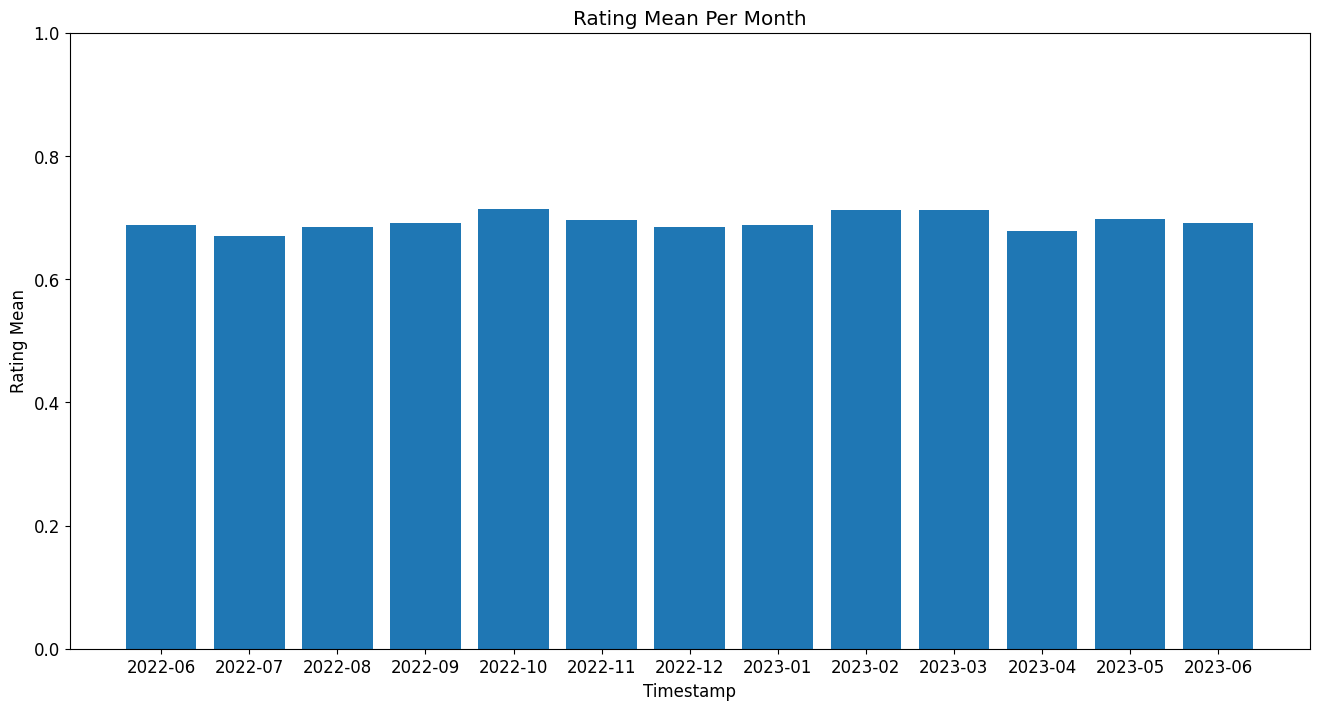

In [13]:
# Assuming ratings_timestamp_per_city is a list of tuples [(datetime, numerical value), ...]

# Separate the datetime and numerical value into two lists
sorted_ratings_average_per_month = sorted(ratings_average_per_month.items(), key=lambda tup: tup[0])

month_groups = [item[0] for item in sorted_ratings_average_per_month]
ratings_average_per_month = [item[1] for item in sorted_ratings_average_per_month]
fig = plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = 12

plt.bar(month_groups, ratings_average_per_month)

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Rating Mean')
plt.title('Rating Mean Per Month')

plt.ylim(0, 1)


# Show the plot
plt.show()

## Analysis

The presented bar plot illustrates the overall satisfaction levels of customers based on their ratings. Interestingly, it reveals a remarkable consistency and stability in customer satisfaction over time. This finding is particularly noteworthy considering the significant inflationary trends observed during the period from 2022 to the present. Despite these economic challenges, the data suggests that customers remain highly satisfied and motivated to spend on food. This observation prompts further investigation into the factors that contribute to customer satisfaction, even in the face of inflationary pressures.

In [14]:
sorted_datetime_list = sorted(timestamps)

print("first yemeksepeti review date: ", sorted_datetime_list[0])
print("last yemeksepeti review date: ", sorted_datetime_list[-1])

first yemeksepeti review date:  2022-06-07 08:51:40
last yemeksepeti review date:  2023-06-09 18:43:58


## Final Note/Conclusion

One important limitation of this dataset is its restricted timeframe, starting from June 2022 and not extending further back in time. However, it is crucial to recognize that this specific period coincides with a significant rise in inflation compared to previous periods. Consequently, this dataset provides a valuable opportunity to examine consumer behavior within the context of inflation. By carefully analyzing the available data, we can draw meaningful conclusions and shed light on the dynamics and patterns of consumer preferences during inflationary periods.